In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahabziari","key":"c22fcf727f5de65b6368e153ddbbef6d"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 95% 88.0M/93.0M [00:00<00:00, 90.2MB/s]
100% 93.0M/93.0M [00:00<00:00, 101MB/s] 


In [6]:
!unzip '/content/apartment-rental-offers-in-germany.zip' -d '/content/'

Archive:  /content/apartment-rental-offers-in-germany.zip
  inflating: /content/immo_data.csv  


# **DATA**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/content/immo_data.csv')

In [8]:
for i in train.columns.to_list():
  nulls = train[[i]].isnull().sum()[0]
  print("null datas of " + i)
  print(nulls)

null datas of regio1
0
null datas of serviceCharge
6909
null datas of heatingType
44856
null datas of telekomTvOffer
32619
null datas of telekomHybridUploadSpeed
223830
null datas of newlyConst
0
null datas of balcony
0
null datas of picturecount
0
null datas of pricetrend
1832
null datas of telekomUploadSpeed
33358
null datas of totalRent
40517
null datas of yearConstructed
57045
null datas of scoutId
0
null datas of noParkSpaces
175798
null datas of firingTypes
56964
null datas of hasKitchen
0
null datas of geo_bln
0
null datas of cellar
0
null datas of yearConstructedRange
57045
null datas of baseRent
0
null datas of houseNumber
71018
null datas of livingSpace
0
null datas of geo_krs
0
null datas of condition
68489
null datas of interiorQual
112665
null datas of petsAllowed
114573
null datas of street
0
null datas of streetPlain
71013
null datas of lift
0
null datas of baseRentRange
0
null datas of typeOfFlat
36614
null datas of geo_plz
0
null datas of noRooms
0
null datas of therma

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [30]:
drop_columns=[]
nulls=train.isnull().sum()
for i,j in enumerate(nulls):
  if(j>150000):
    drop_columns.append(i)
len(drop_columns)

7

In [31]:
drop_columns_name=[]
for i in drop_columns:
  drop_columns_name.append(train.columns[i])
train.drop(columns=drop_columns_name, inplace=True)
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,115641081,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,66924271,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,110938302,gas,False,Nordrhein_Westfalen,True,9.0,840.0,58,70.00,Köln,first_time_use,sophisticated,no,Idastra&szlig;e,Idastraße,True,6,apartment,51069,2.0,2

In [32]:
train = train.drop(columns=['scoutId','houseNumber' , 'street','streetPlain','description', 'facilities','date'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,Dortmund,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,NaN,False,Sachsen,True,9.0,965.0,83.80,Dresden,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,district_heating,False,Sachsen,False,2.0,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,gas,False,Bremen,False,1.0,765.0,84.97,Bremen,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,geothermal,False,Bayern,True,9.0,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,gas,True,Hessen,False,4.0,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,gas,False,Hessen,True,2.0,650.0,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,gas,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,Köln,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,3,Köln,Dellbrück


In [ ]:
#delete_index = train[train['serviceCharge'].isna()].index
#train.drop(index = delete_index, inplace=True)

In [ ]:
#train.drop(labels=['telekomHybridUploadSpeed' , 'R_emaildomain'], axis=1, inplace=True)

In [ ]:
#train.heatingType.fillna(train.heatingType.mode()[0] , inplace=True)

In [ ]:
#label : telekomTvOffer
#heatingType


In [ ]:
#plt.figure(figsize=(20,8))

#sns.countplot(train['heatingType'])

In [13]:
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        print('column : {} , unique values : {}'.format(cols,train[cols].nunique()))

column : regio1 , unique values : 16
column : heatingType , unique values : 13
column : telekomTvOffer , unique values : 3
column : newlyConst , unique values : 2
column : balcony , unique values : 2
column : firingTypes , unique values : 132
column : hasKitchen , unique values : 2
column : geo_bln , unique values : 16
column : cellar , unique values : 2
column : geo_krs , unique values : 419
column : condition , unique values : 10
column : interiorQual , unique values : 4
column : petsAllowed , unique values : 3
column : lift , unique values : 2
column : typeOfFlat , unique values : 10
column : garden , unique values : 2
column : regio2 , unique values : 419
column : regio3 , unique values : 8684


In [33]:
train = train.drop(columns = ['firingTypes','geo_krs','regio2','regio3'])
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,False,Rheinland_Pfalz,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,False,Sachsen,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,False,Sachsen,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,False,Bremen,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,False,Bayern,True,9.0,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,True,Hessen,False,4.0,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,False,Hessen,True,2.0,650.0,95.00,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.70,NaN,5.0,2,False,3


In [ ]:
#train.serviceCharge.fillna(train.serviceCharge.mode()[0] , inplace=True)
#train.pricetrend.fillna(train.pricetrend.mode()[0] , inplace=True)
#train.telekomUploadSpeed.fillna(train.telekomUploadSpeed.mode()[0] , inplace=True)
#train.totalRent.fillna(train.totalRent.mode()[0] , inplace=True)
#train.yearConstructedRange.fillna(train.yearConstructedRange.mode()[0] , inplace=True)
#train.yearConstructed.fillna(train.yearConstructed.mode()[0] , inplace=True)
#train.thermalChar.fillna(train.thermalChar.mode()[0] , inplace=True)
#train.floor.fillna(train.floor.mode()[0] , inplace=True)
#train.numberOfFloors.fillna(train.numberOfFloors.mode()[0] , inplace=True)
#train.info()

In [34]:
train._get_numeric_data().dtypes
train.fillna(train._get_numeric_data().mean(),inplace = True)

In [16]:
train

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,False,Nordrhein_Westfalen,True,2.0,595.0,86.00,well_kept,normal,NaN,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,False,Rheinland_Pfalz,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,False,Sachsen,True,9.0,965.0,83.80,first_time_use,sophisticated,NaN,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,False,Sachsen,False,2.0,343.0,58.15,NaN,NaN,NaN,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,False,Bremen,False,1.0,765.0,84.97,refurbished,NaN,NaN,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.000000,910.000000,2016.0,False,Bayern,True,9.0,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,28.804928,1150.000000,1983.0,True,Hessen,False,4.0,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.000000,930.000000,1965.0,False,Hessen,True,2.0,650.0,95.00,well_kept,NaN,negotiable,False,5,apartment,65552,4.0,160.770000,1.000000,2.000000,4,True,4
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,28.804928,1015.000000,2019.0,False,Nordrhein_Westfalen,True,9.0,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.700000,2.122405,5.000000,2,False,3


In [35]:
for co in train.columns:
    if train[co].dtype == 'int64' or train[co].dtype == 'float64':
        upper_lim = train[co].mean() + 3 * train[co].std()
        lower_lim = train[co].mean() - 3 * train[co].std()
        
        indices = train[(train[co] > upper_lim) | (train[co] < lower_lim)].index
        train = train.drop(indices)

In [36]:
train.shape

(258567, 31)

In [37]:
for cols in train.columns:
    if train[cols].dtype == 'int64' or train[cols].dtype == 'float64':
        if cols != 'livingSpace':
            #train[cols] = ((train[cols] - min(train[cols]))/(max(train[cols]) - min(train[cols])))
            train[cols] = ((train[cols] - train[cols].mean())/(train[cols].std()))

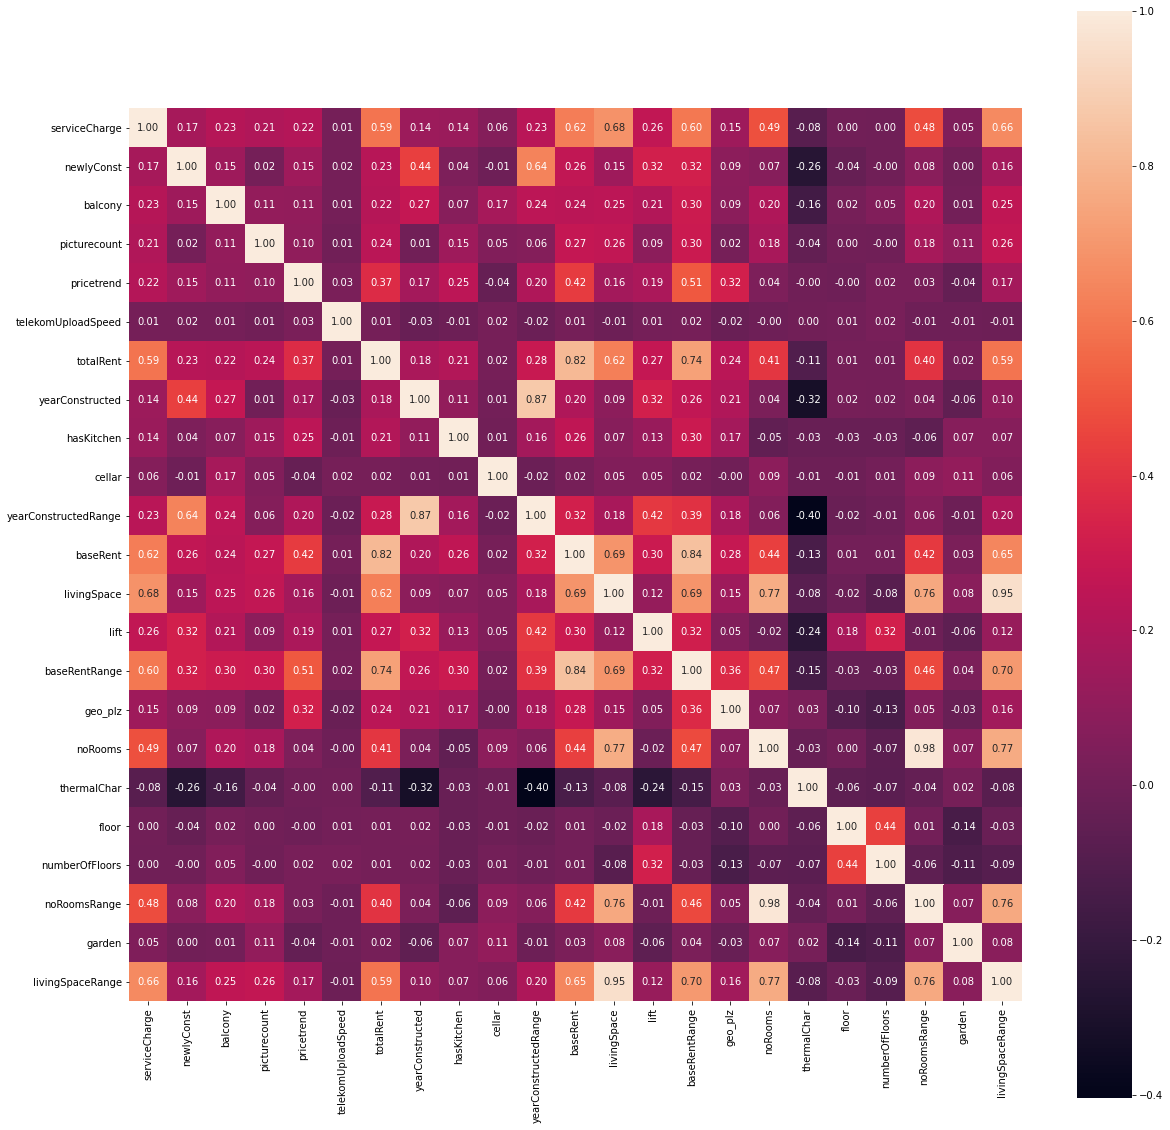

In [38]:
correlation = train.corr()
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlation, square = True,fmt='.2f' ,annot = True)

In [39]:
categorical_columns = []
for cols in train.columns:
    if train[cols].dtype == 'object' or train[cols].dtype == 'bool':
        categorical_columns.append(cols)
        
categorical_columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden']

In [40]:
temp = pd.get_dummies(train[categorical_columns])

In [41]:
train = pd.concat([train, temp], axis=1)
train = train.drop(columns = categorical_columns)
train

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,...,geo_bln_Brandenburg,geo_bln_Bremen,geo_bln_Hamburg,geo_bln_Hessen,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,1.182833,-0.616990,0.698092,-1.234524,0.045552,-0.088239,-0.716351,-0.083496,86.00,0.127524,0.249131,1.422715,1.915460,-0.787600,-0.369128,1.539791,0.681934,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,-0.181795,-0.259074,0.079636,-1.234524,0.161787,-2.875390,-1.129501,0.334331,89.00,0.583179,1.082916,0.391944,0.062764,0.036426,0.049522,0.466695,0.681934,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,1.305773,-0.259074,-0.323704,-1.734112,0.917339,1.512890,2.175701,0.670631,83.80,1.038835,-1.303099,0.391944,0.062764,0.680723,0.362370,0.466695,0.681934,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-1.114291,-0.080116,-0.963671,0.737533,0.161787,-0.117890,-0.716351,-0.597118,58.15,-0.783787,-0.997413,0.391944,-0.736393,0.680723,0.049522,0.466695,-0.756074,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.132619,1.709464,-0.463529,0.001622,0.164949,-0.532998,-1.129501,0.262995,84.97,0.583179,-0.328155,0.391944,2.123939,-0.787600,0.049522,0.466695,0.681934,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,-0.722729,-1.690738,-0.312949,-1.234524,0.178215,1.423938,2.175701,0.375095,90.00,1.038835,1.619754,0.391944,0.062764,0.036426,0.049522,0.466695,0.681934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
268846,0.875485,0.456758,1.703754,0.001622,0.633061,0.445470,0.109949,0.599295,115.00,1.038835,1.121028,0.907329,0.062764,-0.787600,-1.832123,0.466695,1.400938,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
268847,0.875

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258567 entries, 0 to 268849
Data columns (total 92 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   serviceCharge                                 258567 non-null  float64
 1   picturecount                                  258567 non-null  float64
 2   pricetrend                                    258567 non-null  float64
 3   telekomUploadSpeed                            258567 non-null  float64
 4   totalRent                                     258567 non-null  float64
 5   yearConstructed                               258567 non-null  float64
 6   yearConstructedRange                          258567 non-null  float64
 7   baseRent                                      258567 non-null  float64
 8   livingSpace                                   258567 non-null  float64
 9   baseRentRange                                 25

In [42]:
nulls = train.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

# **Resgression**

## **For One Feature without package**

In [56]:
data1 = train.iloc[:50000,:]
data2 = train.iloc[50000:100000,:]
data3 = train.iloc[100000:150000,:]
data4 = train.iloc[150000:200000,:]
data5 = train.iloc[200000:250000,:]

fold1 = pd.concat([data5,data2,data3,data4])
fold2 = pd.concat([data1,data3,data4,data5])
fold3 = pd.concat([data1,data2,data4,data5])
fold4 = pd.concat([data1,data2,data3,data5])
fold5 = pd.concat([data1,data2,data3,data4])

foldx1 = fold1['livingSpaceRange']
foldx2 = fold2['livingSpaceRange']
foldx3 = fold3['livingSpaceRange']
foldx4 = fold4['livingSpaceRange']
foldx5 = fold5['livingSpaceRange']

foldy1 = fold1['livingSpace']
foldy2 = fold2['livingSpace']
foldy3 = fold3['livingSpace']
foldy4 = fold4['livingSpace']
foldy5 = fold5['livingSpace']

x_fold = [foldx1,foldx2,foldx3,foldx4,foldx5]
y_fold = [foldy1,foldy2,foldy3,foldy4,foldy5]

In [57]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
accuracy = []
mse = []
for i in range(5):

  np.random.seed(42)
  epochs = 10000
  b = np.random.randn(1)
  w = np.random.randn(1)
  lr = 0.01

  for epoch in range(epochs):
      error = y_fold[i] -((w*x_fold[i]) + b)

      loss = (error**2).mean()

      if loss > 10**50 :
        break

      if (epoch+1) % 5000 == 0:    
          print('epoch( ' + str(i) + ')' + str(epoch+1)+'  mse: ' + str(loss))
    
      wgrad = 0
      bgrad = 0
    
      wgrad = -1 * (x_fold[i] * error).mean()
      w = w - (lr * wgrad)
        
      bgrad = -1 * error.mean()
      b = b - (lr*bgrad)

  pred = (w * x_fold[i]) + b            
  accuracy.append(sklearn.metrics.r2_score(y_fold[i],pred))
  mse.append(mean_squared_error(y_fold[i],pred))

epoch( 0)5000  mse: 92.77927720980158
epoch( 0)10000  mse: 92.77927720980158
epoch( 1)5000  mse: 94.48243140331518
epoch( 1)10000  mse: 94.48243140331518
epoch( 2)5000  mse: 91.67885459727641
epoch( 2)10000  mse: 91.67885459727641
epoch( 3)5000  mse: 93.44239589039894
epoch( 3)10000  mse: 93.44239589039894
epoch( 4)5000  mse: 92.15163854016103
epoch( 4)10000  mse: 92.15163854016103


In [58]:
print('Accuracy : ' + str(np.mean(accuracy)*100))
print('MSE : ' + str(np.mean(mse)))

Accuracy : 90.44175152650119
MSE : 92.90691952819145


In [59]:
#np.random.seed(42)
#bias = np.random.randn(1)
#w = np.random.randn(1)
#n = train_x.shape[0]

#lr = 0.01
#epochs = 500

#for epoch in range(epochs):
#    error = 1/2 * (trainy - ((w * train_x) + bias))
    
#    if epoch % 10 == 0:    
#        print('epoch {} , MeanSquaredError : {}'.format(epoch,(error**2).mean()))
#        
#    gradian_w = 0 
#    gradian_b = 0
#    gradian_w = -1 * (train_x * error).mean()
#    w = w - (lr * gradian_w)
        
#    gradian_b = -1 * error.mean()
#    bias = bias - (lr*gradian_b)

In [60]:
#pred = (w * test_x) + bias
#prediction = pd.DataFrame({'test':testy,'predict':pred})
#prediction.head()

In [61]:
#prediction['upper_range'] = prediction['test'] * 1.2
#prediction['lower_range'] = prediction['test'] * 0.8
#print ("Accuracy : ")
#prediction[(prediction['upper_range'] >=prediction['predict']) & (prediction['predict'] >= prediction['lower_range'])].shape[0] * 100/prediction.shape[0]

## **With Package - 1 Feature**

In [62]:
y = train['livingSpace'].values
train = train.drop('livingSpace', axis=1, inplace=False)
x = train.values
x1 = train['livingSpaceRange'].values

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
reg1 = LinearRegression()
x1 = x1.reshape(-1,1)
reg1.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
reg1_MSE_5fold = cross_val_score(reg1 , x1, y , scoring='neg_mean_squared_error',cv = 5)
reg1_MSE_10fold = cross_val_score(reg1 , x1, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg1_MSE_5fold) , '\n')
print(abs(reg1_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg1_MSE_5fold)), abs(np.mean(reg1_MSE_10fold))))

[92.84671121 86.82192162 99.73043224 90.18207149 92.67367997] 

[ 97.8508252   87.84570045  79.76683578  93.8953763  106.03276639
  93.4191923   91.8701607   88.49396929  96.25458002  89.08966041] 

mean MSE in five_cv_scores is 92.45 and in ten_cv_scores is 92.45


In [65]:
reg1_Acc_5fold = cross_val_score(reg1 , x1, y ,cv = 5)
reg1_Acc_10fold = cross_val_score(reg1 , x1 ,y, cv = 10)

print(reg1_Acc_5fold , '\n')
print(reg1_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg1_Acc_5fold) * 100, np.mean(reg1_Acc_10fold) * 100) )

[0.90374261 0.90984619 0.8995272  0.90694818 0.90440722] 

[0.89992836 0.90765947 0.91410266 0.90585533 0.89320141 0.90587962
 0.90501618 0.90886358 0.90252503 0.9063552 ] 

mean acuuracy in five_cv_scores is 90.49% and in ten_cv_scores is 90.49%


## **4 features**

In [66]:
x2 = train[['noRooms' , 'livingSpaceRange' , 'thermalChar' , 'numberOfFloors']].values

In [67]:
reg2 = LinearRegression()
reg2.fit(x2 , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
reg2_MSE_5fold = cross_val_score(reg2 , x2 , y , scoring='neg_mean_squared_error',cv = 5)
reg2_MSE_10fold = cross_val_score(reg2 , x2, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg2_MSE_5fold) , '\n')
print(abs(reg2_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg2_MSE_5fold)), abs(np.mean(reg2_MSE_10fold))))

[88.43982688 82.33537935 94.81745572 86.46980265 88.08198228] 

[ 94.258808    82.64273434  75.71064993  88.9813297  100.78988883
  88.82666469  87.68270353  85.25202846  91.31302497  84.8469528 ] 

mean MSE in five_cv_scores is 88.03 and in ten_cv_scores is 88.03


In [69]:
reg2_Acc_5fold = cross_val_score(reg2 , x2 , y ,cv = 5)
reg2_Acc_10fold = cross_val_score(reg2 , x2  , y, cv = 10)

print(reg2_Acc_5fold , '\n')
print(reg2_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg2_Acc_5fold) * 100, np.mean(reg2_Acc_10fold) * 100) )

[0.90831138 0.91450491 0.90447675 0.91077858 0.90914355] 

[0.90360191 0.91312865 0.91847059 0.91078243 0.89848216 0.91050662
 0.90934556 0.91220233 0.90752924 0.91081483] 

mean acuuracy in five_cv_scores is 90.94% and in ten_cv_scores is 90.95%


## **any feautre(ALL)**

In [70]:
reg3 = LinearRegression()

reg3.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
reg3_MSE_5fold = cross_val_score(reg3 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg3_MSE_10fold = cross_val_score(reg3 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg3_MSE_5fold) , '\n')
print(abs(reg3_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg3_MSE_5fold)), abs(np.mean(reg3_MSE_10fold))))

[68.61029195 63.69514993 69.47833668 76.47159878 64.98104307] 

[74.98410811 62.34024548 59.17433013 68.18443305 72.11858591 66.56008534
 83.6049072  66.52418097 64.33760182 65.4101558 ] 

mean MSE in five_cv_scores is 68.65 and in ten_cv_scores is 68.32


In [72]:

reg3_Acc_5fold = cross_val_score(reg3 , x, y ,cv = 5)
reg3_Acc_10fold = cross_val_score(reg3 , x ,y, cv = 10)

print(reg3_Acc_5fold , '\n')
print(reg3_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg3_Acc_5fold) * 100, np.mean(reg3_Acc_10fold) * 100) )

[0.92886934 0.93386048 0.93000448 0.92109494 0.93297214] 

[0.92331406 0.93446997 0.93627781 0.93163454 0.92736054 0.93294033
 0.91356156 0.93148939 0.93484668 0.93124543] 

mean acuuracy in five_cv_scores is 92.94% and in ten_cv_scores is 92.97%


## **RIDGE**

In [73]:
from sklearn.linear_model import Ridge

reg4 = Ridge(alpha=0.1, normalize=True)
reg4.fit(x, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [74]:

reg4_MSE_5fold = cross_val_score(reg4 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg4_MSE_10fold = cross_val_score(reg4 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg4_MSE_5fold) , '\n')
print(abs(reg4_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg4_MSE_5fold)), abs(np.mean(reg4_MSE_10fold))) )

[81.30808896 75.93373478 82.51966294 83.20575239 77.06414271] 

[88.55342573 73.90048563 71.58834071 80.25581466 85.59060113 79.1518256
 88.52826247 78.02315692 77.32461206 76.72155258] 

mean MSE in five_cv_scores is 80.01 and in ten_cv_scores is 79.96


In [75]:

reg4_Acc_5fold = cross_val_score(reg4 , x, y ,cv = 5)
reg4_Acc_10fold = cross_val_score(reg4 , x ,y, cv = 10)

print(reg4_Acc_5fold , '\n')
print(reg4_Acc_10fold, '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg4_Acc_5fold)*100 , np.mean(reg4_Acc_10fold)*100 ) )

[0.9157051  0.92115222 0.91686608 0.9141465  0.92050844] 

[0.90943678 0.92231822 0.92290972 0.91953111 0.91379122 0.92025408
 0.90847134 0.91964706 0.92169501 0.91935568] 

mean acuuracy in five_cv_scores is 91.77% and in ten_cv_scores is 91.77%


## **LASSO**

In [76]:
from sklearn.linear_model import Lasso

reg5 = Lasso(alpha=0.001, normalize=True)
reg5.fit(x, y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
reg5_MSE_5fold = cross_val_score(reg5 , x, y , scoring='neg_mean_squared_error',cv = 5)
reg5_MSE_10fold = cross_val_score(reg5 , x, y,scoring='neg_mean_squared_error', cv = 10)

print(abs(reg5_MSE_5fold) , '\n')
print(abs(reg5_MSE_10fold), '\n')

print('mean MSE in five_cv_scores is {0:.2f} and in ten_cv_scores is {1:.2f}'.format(abs(np.mean(reg5_MSE_5fold)), abs(np.mean(reg5_MSE_10fold))) )

[74.66893036 69.60957637 77.2471526  74.83020507 71.65843507] 

[80.66410504 69.03163281 64.58808235 74.99274588 81.46793115 73.0954822
 78.98569293 70.77555935 72.78612411 70.74538714] 

mean MSE in five_cv_scores is 73.60 and in ten_cv_scores is 73.71


In [78]:

reg5_Acc_5fold = cross_val_score(reg5 , x, y ,cv = 5)
reg5_Acc_10fold = cross_val_score(reg5 , x, y, cv = 10)

print(reg5_Acc_5fold , '\n')
print(reg5_Acc_10fold , '\n')

print('mean acuuracy in five_cv_scores is {0:.2f}% and in ten_cv_scores is {1:.2f}%'.format(np.mean(reg5_Acc_5fold)*100 , np.mean(reg5_Acc_10fold)*100 ) )

[0.92258815 0.92771908 0.92217784 0.92278857 0.92608442] 

[0.91750515 0.9274362  0.93044798 0.92480815 0.91794367 0.92635588
 0.91833733 0.92711107 0.92629104 0.92563741] 

mean acuuracy in five_cv_scores is 92.43% and in ten_cv_scores is 92.42%
